In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
# Define the KNN classifier from scratch
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)[0][0]
            predictions.append(most_common)
        return np.array(predictions)

In [6]:
# Function to plot accuracy vs. different k values
def plot_k_vs_accuracy(X_train, X_test, y_train, y_test, max_k=20):
    accuracies = []
    for k in range(1, max_k + 1):
        knn = KNNClassifier(k=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_k + 1), accuracies, marker='o', color='blue')
    plt.title("Accuracy for different values of K")
    plt.xlabel("K value")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.xticks(range(1, max_k + 1))
    plt.show()

    # Best K
    best_k = np.argmax(accuracies) + 1
    print(f"Best K is {best_k} with accuracy = {accuracies[best_k - 1]:.4f}")
    return best_k

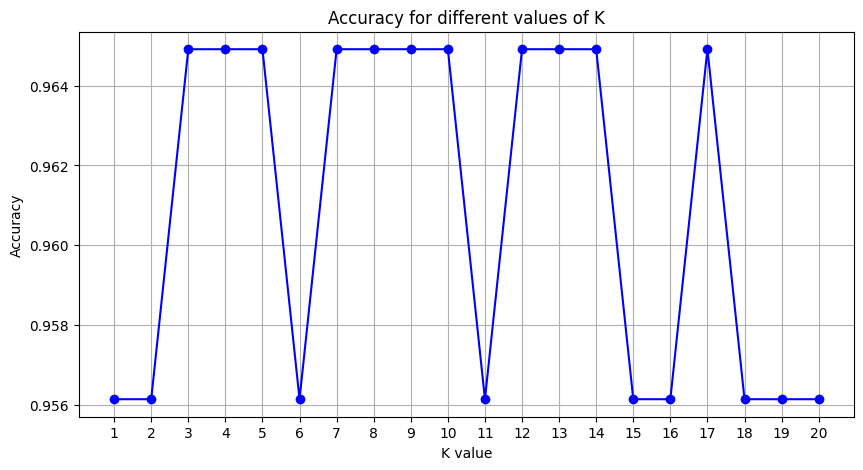

Best K is 3 with accuracy = 0.9649


In [7]:
# Determine the best k
best_k = plot_k_vs_accuracy(X_train, X_test, y_train, y_test)

In [8]:
# Train and evaluate the final model
final_knn = KNNClassifier(k=best_k)
final_knn.fit(X_train, y_train)
final_preds = final_knn.predict(X_test)
final_acc = accuracy_score(y_test, final_preds)
print(f"Final accuracy using K={best_k}: {final_acc:.4f}")

Final accuracy using K=3: 0.9649
